In [ ]:
##############################################################################
#
# This python notebook downloads MPG data from UCIML repo and performs
# standardization, training, validation and testing data splits before using the
# manual MLP model to train to predict mile per gallon for the given classes.
#
#     02/25/2025
#     Vimal Thomas Joseph
#
# Initial Draft
#
#############################################################################


import math
!pip install ucimlrepo
!pip install scikit-learn

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# Combine features and target into one DataFrame for easy filtering
data = pd.concat([X, y], axis=1)

# Drop rows where the target variable is NaN
cleaned_data = data.dropna()

# Split the data back into features (X) and target (y)
X = cleaned_data.iloc[:, :-1]
y = cleaned_data.iloc[:, -1]

# Display the number of rows removed
rows_removed = len(data) - len(cleaned_data)
print(f"Rows removed: {rows_removed}")

Rows removed: 6


In [ ]:
from sklearn.model_selection import train_test_split

# Do a 70/30 split (e.g., 70% train, 30% other)
X_train, X_leftover, y_train, y_leftover = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    shuffle=True,
)

# Split the remaining 30% into validation/testing (15%/15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_leftover, y_leftover,
    test_size=0.5,
    random_state=42,
    shuffle=True,
)

# Compute statistics for X (features)
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

# Standardize X
X_train = (X_train - X_mean) / X_std
X_val = (X_val - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

# Compute statistics for y (targets)
y_mean = y_train.mean()
y_std = y_train.std()

# Standardize y
y_train = (y_train - y_mean) / y_std
y_val = (y_val - y_mean) / y_std
y_test = (y_test - y_mean) / y_std

In [ ]:
#store the spilt data values in the train_x,train_y... for further steps.
train_x, train_y = X_train.values, y_train.values
val_x, val_y =     X_val.values, y_val.values
test_x, test_y =   X_test.values, y_test.values

train_y = train_y.reshape(-1, 1)
val_y = val_y.reshape(-1, 1)
test_y = test_y.reshape(-1, 1)

#print the initial shapes.
print(train_x.shape, train_y.shape)
print(val_x.shape, val_y.shape)
print(test_x.shape, test_y.shape)

(274, 7) (274, 1)
(59, 7) (59, 1)
(59, 7) (59, 1)


In [ ]:
# Download the MLP model stored in github.

!git clone https://github.com/vimalthomas-db/deeplearning.git
%cd deeplearning/

%run "deploy_multilayerperceptron.ipynb"

Cloning into 'deeplearning'...
remote: Enumerating objects: 198, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 198 (delta 30), reused 2 (delta 2), pack-reused 134 (from 1)
Receiving objects: 100% (198/198), 1.67 MiB | 4.14 MiB/s, done.
Resolving deltas: 100% (113/113), done.
/content/deeplearning


In [ ]:
import numpy as np


## RUN THIS STEP ONLY IF YOU NEED TO FIND OUT BEST POSSIBLE COMBINATIONS
## RUN THIS STEP ONLY IF YOU NEED TO FIND OUT BEST POSSIBLE COMBINATIONS
## RUN THIS STEP ONLY IF YOU NEED TO FIND OUT BEST POSSIBLE COMBINATIONS


#this is an additional block we used for testing to bring out best possible combination of learning rates, bacth sizes and epoch limits.

# Define the hyperparameters
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]
epochs_list = [1000, 2000, 3000]

# Store results
results = []

# Iterate through hyperparameter combinations
for lr in learning_rates:
    for batch_size in batch_sizes:
        for epochs in epochs_list:
            # Initialize the MLP
            mlp = MultilayerPerceptron([
                Layer(train_x.shape[1], 256, Relu(), dropout_rate=0.3),
                Layer(256, 128, Relu(), dropout_rate=0.3),
                Layer(128, 64, Relu(), dropout_rate=0.3),
                Layer(64, 64, Relu(), dropout_rate=0.3),
                Layer(64, 1, Linear())
            ])

            loss_function = SquaredError()

            # Train the model
            train_losses, val_losses = mlp.train(
                train_x=train_x, train_y=train_y,
                val_x=val_x, val_y=val_y,
                loss_func=loss_function,
                learning_rate=lr, batch_size=batch_size, epochs=epochs, model_type='regression', RMSProp=True
            )

            # Store the results
            results.append({
                'learning_rate': lr,
                'batch_size': batch_size,
                'epochs': epochs,
                'train_loss': train_losses[-1],
                'val_loss': val_losses[-1]
            })

# Display the results
for result in results:
    print(result)

Streaming output truncated to the last 5000 lines.
Epoch 28/2000 - Training MSE: 58.9101 - Validation MSE: 36.8210 - Training MAE: 3.2091 - Validation MAE: 2.7242 - Training R²: -58.1259 - Validation R²: -41.3112
Epoch 29/2000 - Training MSE: 23.1609 - Validation MSE: 5.5848 - Training MAE: 2.3543 - Validation MAE: 1.5074 - Training R²: -22.2458 - Validation R²: -5.4175
Epoch 30/2000 - Training MSE: 29.1738 - Validation MSE: 13.5212 - Training MAE: 2.1053 - Validation MAE: 1.8961 - Training R²: -28.2807 - Validation R²: -14.5373
Epoch 31/2000 - Training MSE: 102.2140 - Validation MSE: 19.7279 - Training MAE: 3.0099 - Validation MAE: 2.2432 - Training R²: -101.5884 - Validation R²: -21.6695
Epoch 32/2000 - Training MSE: 51.2540 - Validation MSE: 27.4833 - Training MAE: 2.6995 - Validation MAE: 2.5492 - Training R²: -50.4417 - Validation R²: -30.5812
Epoch 33/2000 - Training MSE: 96.9764 - Validation MSE: 12.4965 - Training MAE: 2.8571 - Validation MAE: 2.0966 - Training R²: -96.3317 - V

In [ ]:
# Create a DataFrame from the results and store the top 5 entries based on best validation loses.
df_result = pd.DataFrame(results)


top_5 = df_result.sort_values(by=['val_loss']).head(5)

# Display the top 5 results
print(top_5)

    learning_rate  batch_size  epochs  train_loss  val_loss
6           0.001         128    1000    0.068504  0.042193
15          0.010         128    1000    0.160612  0.042207
8           0.001         128    3000    0.062137  0.043188
13          0.010          64    2000    0.110720  0.043475
7           0.001         128    2000    0.053245  0.049200


In [ ]:
# Create a DataFrame from the results and store the top 5 entries based on best training loses.
df_result = pd.DataFrame(results)

# Sort by validation loss (ascending) and get the top 5
top_5 = df_result.sort_values(by=['train_loss']).head(5)

# Display the top 5 results
print(top_5)

   learning_rate  batch_size  epochs  train_loss  val_loss
5          0.001          64    3000    0.018504  0.050879
2          0.001          32    3000    0.018825  0.054178
0          0.001          32    1000    0.029088  0.056843
1          0.001          32    2000    0.029431  0.068900
4          0.001          64    2000    0.032818  0.081438


In [ ]:
#calling MLP model built. This is basically chosen from the results above.

mlp = MultilayerPerceptron([
    Layer(train_x.shape[1], 256, Relu(), dropout_rate=0.3),
    Layer(256, 128, Relu(), dropout_rate=0.3),
    Layer(128, 64, Relu(), dropout_rate=0.3),
    Layer(64, 64, Relu(), dropout_rate=0.3),
    Layer(64, 1, Linear())
])

loss_function = SquaredError()
train_losses, val_losses = mlp.train(
    train_x=train_x, train_y=train_y,
    val_x=val_x, val_y=val_y,
    loss_func=loss_function,
    learning_rate=0.001, batch_size=64, epochs=3000, model_type='regression', RMSProp=True
)

Epoch 1/3000 - Training MSE: 0.4873 - Validation MSE: 0.3761 - Training MAE: 0.5353 - Validation MAE: 0.4787 - Training R²: 0.5109 - Validation R²: 0.5678
Epoch 2/3000 - Training MSE: 0.3204 - Validation MSE: 0.3726 - Training MAE: 0.4221 - Validation MAE: 0.4659 - Training R²: 0.6784 - Validation R²: 0.5718
Epoch 3/3000 - Training MSE: 0.3602 - Validation MSE: 0.3070 - Training MAE: 0.4529 - Validation MAE: 0.4074 - Training R²: 0.6385 - Validation R²: 0.6473
Epoch 4/3000 - Training MSE: 0.2843 - Validation MSE: 0.2975 - Training MAE: 0.3965 - Validation MAE: 0.4086 - Training R²: 0.7146 - Validation R²: 0.6582
Epoch 5/3000 - Training MSE: 0.2991 - Validation MSE: 0.3379 - Training MAE: 0.4208 - Validation MAE: 0.4512 - Training R²: 0.6998 - Validation R²: 0.6117
Epoch 6/3000 - Training MSE: 0.3462 - Validation MSE: 0.2893 - Training MAE: 0.4455 - Validation MAE: 0.3826 - Training R²: 0.6526 - Validation R²: 0.6675
Epoch 7/3000 - Training MSE: 0.3380 - Validation MSE: 0.2742 - Trainin

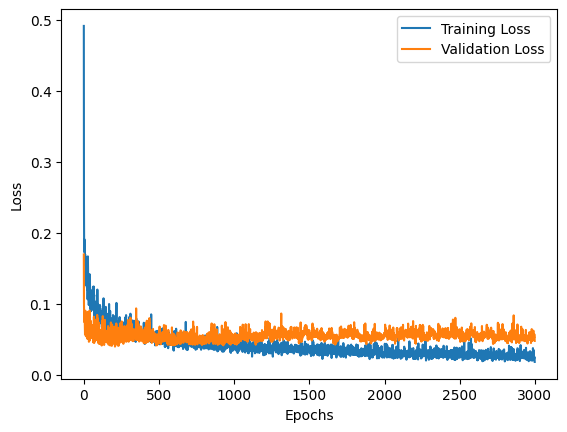

In [ ]:
#Training and Validaiton Loss Plots

import matplotlib.pyplot as plt


plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#print total losses from the training

print(f"Total Training Loss: {train_losses[-1]:.4f}")
print(f"Total Validation Loss: {val_losses[-1]:.4f}")

Total Training Loss: 0.0179
Total Validation Loss: 0.0476


In [ ]:
#evaluating with test dataset


test_result= mlp.forward(test_x,training=False)
actual_predictions = (test_result * y_std) + y_mean
actual_y = (test_y * y_std) + y_mean

In [ ]:
loss_function = SquaredError()
test_loss = loss_function.loss(test_result, test_y)

test_loss_value = np.mean(test_loss)
print(f"Test Loss: {test_loss_value:.4f}")

Test Loss: 0.0465


In [ ]:
import pandas as pd

# Assuming actual_predictions and actual_y are NumPy arrays
# Create a list of predicted and actual values
predicted_values = [actual_predictions[i][0] for i in range(1, 30)]
actual_values = [actual_y[i][0] for i in range(1, 30)]

# Create a pandas DataFrame
df = pd.DataFrame({'Predicted': predicted_values, 'Actual': actual_values})

# Display the DataFrame
display(df)

,Predicted,Actual
0,16.805968,16.0
1,25.267366,27.0
2,13.906656,13.0
3,22.510850,21.0
4,19.194222,19.4
5,14.636901,15.0
6,14.912963,15.0
7,26.055179,22.3
8,21.849788,18.0
9,27.164241,27.4


from matplotlib import pyplot as plt
df['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Predicted', y='Actual', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

,Predicted,Actual
0,16.805968,16.0
1,25.267366,27.0
2,13.906656,13.0
3,22.510850,21.0
4,19.194222,19.4
5,14.636901,15.0
6,14.912963,15.0
7,26.055179,22.3
8,21.849788,18.0
9,27.164241,27.4


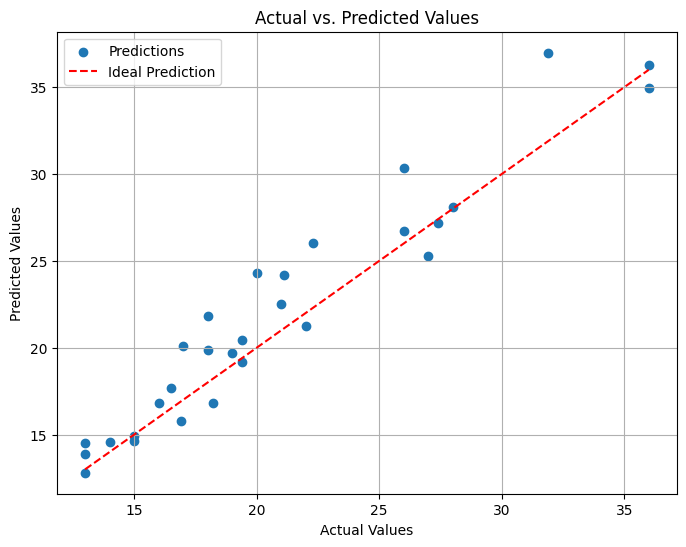

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming actual_predictions and actual_y are NumPy arrays
# Create a list of predicted and actual values
predicted_values = [actual_predictions[i][0] for i in range(1, 30)]
actual_values = [actual_y[i][0] for i in range(1, 30)]

# Create a pandas DataFrame
df = pd.DataFrame({'Predicted': predicted_values, 'Actual': actual_values})

# Display the DataFrame
display(df)

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(df['Actual'], df['Predicted'], label='Predictions')

# Add a line representing the ideal prediction (y = x)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)],
         linestyle='--', color='red', label='Ideal Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()